In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Reionization ##

Let us start by recalling the cosmological paradigm within which reionization sits:

- Nearly scale invariant Gaussian potential perturbations evolve under
  gravitational instability with $n_\gamma/n_b\sim 10^9$.
  (Explains Big Bang Nucleosynthesis, Cosmic microwave background, Large-scale structure.)
    
- Predicts gas cooling from high $z$ and formation of $1^{\rm st}$ objects.
    *  Halo formation reasonably well understood.  Star and BH formation not understood (but many empirical models well constrained now).
    * $1^{\rm st}$ star likely formed at $z>20-50$ (in $10^{5-7}M_\odot$ halo).
    * First galaxies formed in $10^8\,M_\odot$ halos around $z\sim 10^1$ (not directly detectable even with JWST).
    * More massive galaxies formed soon thereafter (and likely drove reionization).  AGN?  X-ray binaries?
    * Their $\sim 10\,$eV photons and soft X-ray heat gas.
    * Then their $>13.6\,$eV photons photo-ionized the IGM.


Constraints on the ionization history of the Universe have historically been dominated by the CMB and studies of the intergalactic medium.  From the fact that we see degree-scale structure in the CMB power spectrum we know that the Universe was once ionized and then rapidly went neutral around $z\simeq 10^3$.  The Universe must have remained neutral for a long time.  From the IGM and from the large-angle polarization of the CMB we know that the Universe reionized again around $z\simeq 10^1$.  This second transition (known as "reionization") is often referred to as "the end of the Dark Ages".

This picture is consistent with a wide range of observations: see [McQuinn 2016](https://arxiv.org/abs/1512.00086) or [Bouwens 2016](https://arxiv.org/abs/1511.01133) for "recent" reviews.   In currently popular models, ultraviolet photons from massive stars in (relatively low mass) early galaxies reionize hydrogen progressively throughout the entire Universe between $z\simeq 12$ and $z\simeq 6$, while quasars take over to reionize helium from $z\simeq 6$ to $z\simeq 2$. The combination of measurements indirectly constrains the nature of the sources driving reionization, and hence the formation of early stars and galaxies. The current observations point towards a "late and fast" reionization period, though with considerable uncertainty.  In theoretical models ionization fronts propagate out from galaxies with a very thing boundary ($\sim 1\,$pkpc).  This leads to an expectation that every region in the Universe is either ionized or neutral ("patchy" reionization).  Inside the ionized regions the gas has been heated to $10^2\to 10^4\,$K (evaporating gas from $10\,$km/s halos).

From the CMB side the two major constraints on the process of reionization are the optical depth to Thomson scattering, $\tau$, and the kinetic Sunyaev-Zeldovich effect (kSZ).  We will take each in turn.

### Optical depth ###

We will compute the optical depth given $x_e(z)$, following the convention that $x_e$ is defined with respect to the Hydrogen.  So this means it exceeds unity when He is reionized.  We will also follow the usual assumption that He becomes singly ionized at the same time as H, but doubly ionized at a much lower redshift (when energetic photons are produced in enough numbers by QSOs).

In [2]:
sigmaT = 6.6524e-29        # SI units.
mass_p = 1.673e-27         # SI units.
Yp     = 0.25              # He mass fraction -- beware Planck redefines as (1/4)number.
ntot4  = 3.9751            # Mass ratio of He/H atoms.
ynum   = Yp/ntot4/(1-Yp)   # Extra number of e per He ionization.
Mpc    = 3.086e22          # SI units.

In [3]:
rhoc   = 1.8784e-26        # SI units, for h=1
Lhub   = 9.252e25          # c/H0 in SI units for h=1
#
OmM = 0.31
hub = 0.6766
wb  = 0.02242
OmB = wb/hub**2
OmL = 1.0-OmM
rhoB= wb * (1-Yp) * rhoc
ne0 = rhoB/mass_p

Text(0.5, 0, 'Redshift')

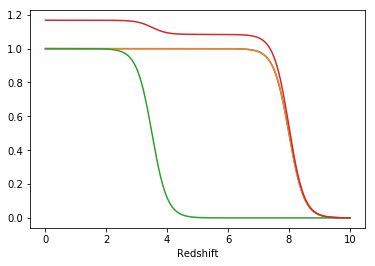

In [4]:
zz  = np.linspace(0.0,10.0,1000)
# Just pick some quasi-random forms for now.
xe_H   = 0.5*( 1+np.tanh((8.0-zz)/0.5) )
xe_HeI = 0.5*( 1+np.tanh((8.0-zz)/0.5) )
xe_HeII= 0.5*( 1+np.tanh((3.5-zz)/0.5) )
# Make the full ionization history.
xe = xe_H + ynum*xe_HeI + ynum*xe_HeII
# Plot the contributions for sanity.
fig,ax = plt.subplots(1,1)
ax.plot(zz,xe_H)
ax.plot(zz,xe_HeI)
ax.plot(zz,xe_HeII)
ax.plot(zz,xe)
ax.set_xlabel('Redshift')

In [5]:
# and compute tau.
zp1 = 1+zz
Ez  = np.sqrt( OmM*zp1**3 + OmL )
dtau= sigmaT*ne0*Lhub*xe*zp1**2/Ez
tau = np.trapz(dtau,x=zz)/hub
print(tau)

0.057686059583205475


Now let us consider the ionization history [proposed by Faucher-Giguere](https://arxiv.org/abs/1903.08657):
$$
  x_e(z) = \left(x_H+x_{HeI}\right)\Theta + x_{HeII}\Theta 
$$
with a 'modified step function', $\Theta$, defined as
$$
  \Theta = \frac{1}{2}\left[1+\sin\left(\frac{\pi[z_0-z]}{2\Delta z}\right) \right]
$$
for $z_0-\Delta z<z<z_0+\Delta z$ and then being $0$ or $1$ outside those limits.  The exact $n_e(z)$ is slightly more complicated than given above leading to $\mathcal{O}(0.01)$ different results for $\tau$, but this will be good enough for our purposes:

Text(0.5, 0, 'Redshift')

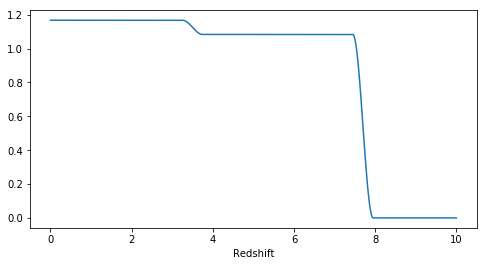

In [6]:
zrei_H ,dz_H  = 7.7,0.25
zrei_He,dz_He = 3.5,0.25
# Set up the contributions, not worrying about clipping \Theta yet.
xe_H   = 0.5*( 1+np.sin(np.pi*(zrei_H -zz)/2/dz_H ) )
xe_HeI = 0.5*( 1+np.sin(np.pi*(zrei_H -zz)/2/dz_H ) )
xe_HeII= 0.5*( 1+np.sin(np.pi*(zrei_He-zz)/2/dz_He) )
# Now clip off the wings of these functions
xe_H[    zz<zrei_H - dz_H ] = 1
xe_H[    zz>zrei_H + dz_H ] = 0
xe_HeI[  zz<zrei_H - dz_H ] = 1
xe_HeI[  zz>zrei_H + dz_H ] = 0
xe_HeII[ zz<zrei_He- dz_He] = 1
xe_HeII[ zz>zrei_He+ dz_He] = 0
# Make the full ionization history.
xe = xe_H + ynum*xe_HeI + ynum*xe_HeII
# Plot it!
fig,ax = plt.subplots(1,1,figsize=(8,4))
ax.plot(zz,xe)
ax.set_xlabel('Redshift')

In [7]:
# and compute tau.
zp1 = 1+zz
Ez  = np.sqrt( OmM*zp1**3 + OmL )
dtau= sigmaT*ne0*Lhub*xe*zp1**2/Ez
tau = np.trapz(dtau,x=zz)/hub
print(tau)

0.054647445388013624


The measurement of the optical depth by Planck provides us width an estimate of the mean redshift of reionization, but it also depends upon how long it takes reionization to occur. We can place an upper limit on the duration of reionization using the Sunyaev-Zeldovich effect:

### Kinetic Sunyaev-Zeldovich effect ###

The Sunyaev-Zeldovich effects are the names given to scattering of (cold) CMB photons by ionized gas in the late time Universe.  Sunyaev and Zeldovich were the first to study such processes in detail.  There are two "SZ effects".  The first, the thermal SZ effect (tSZ) arises when CMB photons scatter off free electrons in ionized plasma in large halos such as cluster of galaxies.  This leads to a spectral distortion as the cold photons tend to gain energy in the scattering.  The effect of interest to us here is the Doppler effect of CMB photons scattering off of free electrons in the high redshift Universe: the kinetic SZ effect (kSZ).

A nice "recent" discussion of many of these terms can be found in [Alvarez 2016](https://arxiv.org/abs/1511.02846).

While highly accurate predictions of the various kSZ contributions really require numerical simulations (hopefully of the reionization process itself), we can get estimates through
integrals over the (linear theory) power spectrum.  To get the power spectrum as a function of scale and time ($k$ and $z$) we typically use a Boltzmann code, such as [CAMB](https://github.com/cmbant/CAMB) or [CLASS](https://github.com/lesgourg/class_public).  Below I will use CLASS as an example.

In [8]:
from classy import Class
# We'll ask for CMB temperature anisotropy spectra, lensed spectra and matter P(k):
params = {
    'output': 'mPk',
    'P_k_max_1/Mpc': 100.,
    'z_pk': '0.0,25.0',
    'A_s': np.exp(3.040)*1e-10,
    'n_s': 0.96824,
    'h': 0.6770,
    'N_ur': 2.0328,  # Or 2.03351?
    'N_ncdm': 1,
    'm_ncdm': 0.06,
    'tau_reio': 0.0568,
    'omega_b': 0.022447,
    'omega_cdm': 0.11923}  
# Create an instance of the CLASS wrapper and set the parameters.
cosmo = Class()
cosmo.set(params)
# Run the whole code.  It should take a few seconds to run.
cosmo.compute()
# and just check by printing out some useful stuff:
print(cosmo.get_current_derived_parameters(['H0','Omega_m','Omega_Lambda',\
                                            'age','conformal_age','Neff',\
                                            'z_reio','100*theta_s','rs_rec','rs_d']))
# We'll want the  background quantities later.
bkgnd = cosmo.get_background()
print("Background contains: ",bkgnd.keys())
# and the growth factors just to see.
for zz in np.arange(0.0,10.1,2.0):
    print("At z={:4.1f}, D(z)={:8.4f}, f(z)={:8.4f}, x_e(z)={:8.4f}".\
          format(zz,cosmo.scale_independent_growth_factor(zz),\
                 cosmo.scale_independent_growth_factor_f(zz),\
                 cosmo.ionization_fraction(zz)))

{'H0': 67.7, 'Omega_m': 0.31052192069532447, 'Omega_Lambda': 0.6893992131586856, 'age': 13.785633583386252, 'conformal_age': 14166.937083683666, 'Neff': 3.045998221453421, 'z_reio': 7.9044952392578125, '100*theta_s': 1.0418265956532584, 'rs_rec': 144.66691134886878, 'rs_d': 147.21414455012248}
Background contains:  dict_keys(['z', 'proper time [Gyr]', 'conf. time [Mpc]', 'H [1/Mpc]', 'comov. dist.', 'ang.diam.dist.', 'lum. dist.', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_b', '(.)rho_cdm', '(.)rho_ncdm[0]', '(.)p_ncdm[0]', '(.)rho_lambda', '(.)rho_ur', '(.)rho_crit', 'gr.fac. D', 'gr.fac. f'])
At z= 0.0, D(z)=  1.0000, f(z)=  0.5214, x_e(z)=  1.1638
At z= 2.0, D(z)=  0.4195, f(z)=  0.9547, x_e(z)=  1.1636
At z= 4.0, D(z)=  0.2550, f(z)=  0.9869, x_e(z)=  1.0917
At z= 6.0, D(z)=  0.1827, f(z)=  0.9926, x_e(z)=  1.0811
At z= 8.0, D(z)=  0.1424, f(z)=  0.9941, x_e(z)=  0.4387
At z=10.0, D(z)=  0.1166, f(z)=  0.9945, x_e(z)=  0.0004


sigma8= 0.807


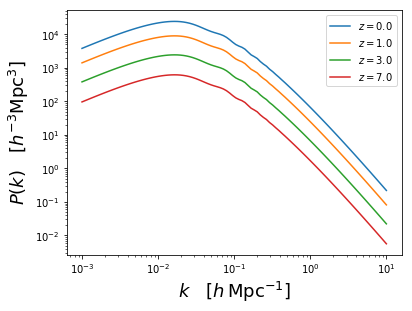

In [9]:
# Let's look at the matter power spectrum -- here we'll convert
# from CLASS's internal Mpc units to Mpc/h units that are more
# common in plots of this type.  Later we'll stick to Mpc.
kk = np.logspace(-3.0,1.0,100)
fig,ax = plt.subplots(1,1,figsize=(6,4.5))
for zz in [0.0,1.0,3.0,7.0]:
    # We could also use the "get_pk" routine ...
    pk = np.array( [cosmo.pk(k*params['h'],zz)*params['h']**3 for k in kk] )
    ax.plot(kk,pk,label="$z={:.1f}$".format(zz))
ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$k\quad [h\,{\rm Mpc}^{-1}]$',fontsize=18)
ax.set_ylabel(r'$P(k)\quad [h^{-3}{\rm Mpc}^3]$',fontsize=18)
#
print("sigma8={:6.3f}".format(cosmo.sigma8()))

The temperature anisotropy induced by the kSZ effect is simply
$$
  \frac{\Delta T}{T} = -\sigma_T\int dt\ n_e v_\parallel\,e^{-\tau}
$$
and has contributions from "low" redshift and from reionization.  The fluctuations in $v$ are relatively straightforward.  When we consider $n_e$ we have two types of fluctuations: those sourced by density perturbations at spatially uniform ionization fraction and those sources by spatially inhomogeneous ionization fractions at fixed density.  The former dominates at "late" times while the former dominates at early times.

For the first effect ($\delta$ fluctuations at fixed $x_e$) it turns out that the long-wavelength velocity perturbations modulating the small-scale density perturbations are the dominant effect (this sometimes goes by the name "Ostriker-Vishniac effect").  The upper limit on the kSZ contribution to the power spectrum at $\ell=3000$ is a few $\mu\,{\rm K}^2$, in terms of $\ell(\ell+1)C_\ell/(2\pi)$.  Since this is an upper limit, and we know *some* of the signal comes from low redshift, this provides an upper limit to the duration of reionization.

If we focus on the piece of the kSZ/OV coming from high redshift then $\ell=3000$ actually comes from relatively low $k$, where the fluctuations are still (close to) linear.  Roughly $\ell=k\chi$, and we expect $\chi>5000\,$Mpc for $z\ge 2$ for example.  So we'll consider linear theory for now (some authors approximately account for non-linear effects by replacing one of the $P_L$ factors below with a non-linear power spectrum -- this gives an indication for the amplitude of non-linearities and can be easily estimated from CLASS -- but remember that once you worry about non-linearity you should probably also worry about baryonic physics).

Note the kSZ/OV is a product of a density and a (line of sight) velocity, i.e. it is a momentum.  Projecting the line-of-sight component onto the sky, extracting the $a_{\ell m}$s and squaring ends up giving
$$
  C_\ell = \frac{1}{2}\left(\sigma_T \bar{n}_{e,0}\right)^2
  \int\frac{d\chi}{a^4\chi^2}\ e^{-2\tau}
  P_{\perp}(k=\ell/\chi)
$$
where $\bar{n}_{e,0}=\bar{n}_{H,0}+\bar{n}_{He,0}$ is the mean number density of electrons assuming singly ionized He at high $z$.  We'll approximate the power spectrum of the momentum using perturbation theory.  Note $\Delta T/T$ has a density ($\delta$) times a velocity ($v$).  Converting $v$ into $\dot{\delta}$ using the continuity equation $\Delta T/T\sim \delta^2$ and so $C_\ell$ will go as $\delta^4$ or as $P_L^2$.  Assuming that baryons trace dark matter and using linear theory and doing out all of the geometry of line-of-sight components etc. gives (Vishniac 1987, Shaw et al. 2012)
$$
  P_{\perp}(k) = (aHf)^2 \int\frac{d^3p}{(2\pi)^3}\ P_L(|\vec{k}-\vec{p}|)P_L(p)
  \frac{k(k-2p\mu)(1-\mu^2)}{p^2(k^2+p^2-2kp\mu)}
$$
where $\mu=\hat{k}\cdot\hat{p}$ and $P_L$ is the linear theory (matter) power spectrum.

Note that this last integral is simply a 2D integral in $|p|$ and $\mu$ which we can brute force at the expense of numerical efficiency.

In [10]:
def P_OV(k,zz=0.0):
    """Returns P_perp/(aHf)^2 at one (scalar) k value by brute forcing the integral"""
    # Let's do the integral by Riemann sum, using \mu and \ln p as our variables.
    # We will follow CLASS's lead and use Mpc units, rather than Mpc/h units.
    kk  = np.logspace(-3.0,2.0,1500)
    pk  = np.array( [cosmo.pk(k,zz) for k in kk] )
    mu  = np.linspace(-0.999,0.999,250)
    P,U = np.meshgrid(kk,mu,indexing='ij')
    kmp = np.sqrt(k**2+P**2-2*k*P*U)
    PL1 = np.interp( P ,kk,pk)
    PL2 = np.interp(kmp,kk,pk)
    kern= k*(k-2*P*U)*(1-U**2)/kmp**2
    intg= np.sum( P*PL1*PL2*kern ) * 2*np.pi * np.log(kk[1]/kk[0]) * (mu[1]-mu[0])
    return(intg/(2*np.pi)**3)    

We are curious how much different redshifts would contribute to $\mathcal{D}_\ell=\ell(\ell+1)C_\ell/(2\pi)$ at $\ell=3000$ if they were ionized.  For simplicity, let us ignore the optical depth factor and assume we have a slice of width $\Delta\chi$ centered at $\chi$.  Then
$$
  \Delta\mathcal{D}_\ell \simeq \frac{\ell(\ell+1)}{4\pi}
  \left(\sigma_T\bar{n}_{e,0}\right)^2
  (1+z)^4\frac{\Delta\chi}{\chi^2}\ P_\perp(k=\ell/\chi)
$$

In [14]:
ell = 3000
dchi= 1e3
zz  = 2.0
aa  = 1.0/(1+zz)
#
Dz  = cosmo.scale_independent_growth_factor(zz)
ff  = cosmo.scale_independent_growth_factor_f(zz)
Hz  = cosmo.Hubble(zz)    # In 1/Mpc.
aHf = aa*Hz*ff
#
chi = np.interp(zz,bkgnd['z'][::-1],bkgnd['comov. dist.'][::-1]) #Mpc.
kval= ell/chi
#
print("z={:.1f}, a={:.4f}, Dz={:.4f}, f={:.3f}, H={:12.4e}/Mpc".\
      format(zz,aa,Dz,ff,Hz))
print("chi={:.1f}Mpc ==> ell={:d} maps to k={:.2f}/Mpc".\
      format(chi,ell,kval))
#
Pperp = aHf**2 * Dz**4 * P_OV(kval,zz=0)
print("P_perp={:12.4e} [Mpc^3]".format(Pperp))
# Now compute Dell and convert to (uK)^2:
ell*(ell+1)/4/np.pi*(sigmaT*ne0*Mpc)**2 * (1+zz)**4 * (dchi/chi**2) * Pperp * (2.73e6)**2

z=2.0, a=0.3333, Dz=0.4195, f=0.955, H=  6.8047e-04/Mpc
chi=5307.5Mpc ==> ell=3000 maps to k=0.57/Mpc
P_perp=  6.2413e-05 [Mpc^3]


0.14394839541585452

Now we turn to the effect of "patchy" reionization, i.e. modulations in $x_e$.  Since these tend to be correlated with $\delta$ in a fairly complex manner it gets hard to proceed analytically (though see [Gruzinov & Hu 1998](https://arxiv.org/abs/astro-ph/9803188) for a nice toy model).

Typically people run reionization simulations, vary the timing and duration of reionization, and then provide a fit for the power at $\ell=3000$.  A popular example fitting function is due to [Battaglia et al. 2013](https://arxiv.org/abs/1211.2832).  These authors used a parametric model of reionization with a mean redshift and a width: $\Delta_z=z(x_e=0.25)-z(x_e=0.75)$.  They then quote (their Eq. 10)
$$
  \mathcal{D}_{3000} \simeq 2.02\,\mu\mathrm{K}^2
  \ \left[\left(\frac{1+\bar{z}}{11}\right)-0.12\right]
  \left(\frac{\Delta_z}{1.05}\right)^{0.47}
$$

If we take $\bar{z}=7.7$, consistent with the Planck 2018 $\tau$ value, and assume $\mathcal{D}_{3000}<2\,\mu\mathrm{K}^2$ then
$$
  2\mu\mathrm{K}^2\ 0.67\ \left(\frac{\Delta_z}{1.05}\right)^{0.47} \le 2
  \quad\Rightarrow\quad \Delta_z<2.5
$$

For more information about how one might map out reionization using the kSZ effect, see [Smith & Ferraro (2016)](https://arxiv.org/abs/1607.01769).